# 6.4 Supervised Machine Learning - Regression

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning and formatting
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Display charts in the notebook 

%matplotlib inline

In [4]:
# Define path

path = r'C:\Users\polly\Documents\Achievement 6 Project'

In [5]:
# Import main dataframe from last exercise

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'wbl_adjusted.csv'),index_col=False)

In [6]:
# Check dataframe output

df.head()

,country_year,country,country_code,region,income_group,year,wbl_index,mobility,workplace,pay,marriage,parenthood,business,assets,pension
0,AFG1971,Afghanistan,AFG,South Asia,Low income,1971,26.3,25,25,0,20,0,75,40,25
1,AFG1972,Afghanistan,AFG,South Asia,Low income,1972,26.3,25,25,0,20,0,75,40,25
2,AFG1973,Afghanistan,AFG,South Asia,Low income,1973,26.3,25,25,0,20,0,75,40,25
3,AFG1974,Afghanistan,AFG,South Asia,Low income,1974,26.3,25,25,0,20,0,75,40,25
4,AFG1975,Afghanistan,AFG,South Asia,Low income,1975,26.3,25,25,0,20,0,75,40,25


In [7]:
# Check size of dataframe

df.shape

(9639, 15)

In [8]:
# Check datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9639 entries, 0 to 9638
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_year  9639 non-null   object 
 1   country       9639 non-null   object 
 2   country_code  9639 non-null   object 
 3   region        9639 non-null   object 
 4   income_group  9639 non-null   object 
 5   year          9639 non-null   int64  
 6   wbl_index     9639 non-null   float64
 7   mobility      9639 non-null   int64  
 8   workplace     9639 non-null   int64  
 9   pay           9639 non-null   int64  
 10  marriage      9639 non-null   int64  
 11  parenthood    9639 non-null   int64  
 12  business      9639 non-null   int64  
 13  assets        9639 non-null   int64  
 14  pension       9639 non-null   int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 1.1+ MB


In [9]:
# Import new dataframe - per capita GDP from 1991 to 2021

df_gdp = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'GDP per capita 1991 to 2021.csv'),index_col=False)

In [10]:
# Check output of new dataframe

df_gdp.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,183.532775,183.532775,183.532775,183.532775,183.532775,183.532775,183.532775,183.532775,183.532775,183.532775,183.532775,183.532775,200.462567,221.657604,255.055120,274.000487,375.078128,387.849174,443.845150,554.595200,621.912311,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614
1,Angola,AGO,867.123435,657.653384,442.445234,329.691784,398.120223,523.274940,514.309887,423.393453,387.689415,556.884244,527.463202,872.657772,982.805601,1254.695563,1900.724725,2597.962682,3121.350475,4081.715004,3123.697586,3496.784796,4511.153227,4962.552072,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757
2,Albania,ALB,336.586995,200.852220,367.279225,586.416340,750.604449,1009.977275,717.380048,813.789397,1033.242532,1126.683340,1281.659826,1425.124219,1846.120121,2373.581292,2673.786584,2972.742924,3595.038057,4370.539925,4114.134899,4094.348386,4437.142612,4247.630047,4413.062005,4578.633208,3952.802538,4124.055390,4531.019374,5287.663694,5396.215864,5332.160475,6492.872012
3,United Arab Emirates,ARE,25668.493320,25630.080970,25019.372360,25463.496290,27010.678190,28596.506830,28709.246920,25905.843380,27261.906570,31855.500600,29909.009430,30221.967000,32607.372930,37017.736370,42190.554380,45339.585120,43918.380170,45140.769080,31722.588760,34165.913310,40893.023360,44386.786080,45729.607680,46865.964600,41525.138900,41054.539570,43063.967480,46722.268720,45376.170840,37629.174170,44315.554180
4,Argentina,ARG,5730.723810,6815.618290,6957.417499,7464.474737,7383.704510,7690.157003,8176.771195,8250.673174,7735.322080,7666.517834,7168.975872,2579.488769,3333.152904,4258.160261,5086.627761,5890.978002,7210.595548,8977.506851,8184.389889,10385.964430,12848.864200,13082.664330,13080.254730,12334.798250,13789.060420,12790.242470,14613.041820,11795.159390,9963.672506,8496.424142,10636.120200


In [11]:
# Check size of new dataframe

df_gdp.shape

(189, 33)

### 2. Data cleaning and formatting

In [12]:
# Change names of columns in new dataframe:'Country Name' and 'Country Code' to match main dataframe

df_gdp.rename(columns = {'Country Name':'country', 'Country Code':'country_code'}, inplace = True)

In [13]:
# Check output

df_gdp.head()

,country,country_code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,183.532775,183.532775,183.532775,183.532775,183.532775,183.532775,183.532775,183.532775,183.532775,183.532775,183.532775,183.532775,200.462567,221.657604,255.055120,274.000487,375.078128,387.849174,443.845150,554.595200,621.912311,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614
1,Angola,AGO,867.123435,657.653384,442.445234,329.691784,398.120223,523.274940,514.309887,423.393453,387.689415,556.884244,527.463202,872.657772,982.805601,1254.695563,1900.724725,2597.962682,3121.350475,4081.715004,3123.697586,3496.784796,4511.153227,4962.552072,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757
2,Albania,ALB,336.586995,200.852220,367.279225,586.416340,750.604449,1009.977275,717.380048,813.789397,1033.242532,1126.683340,1281.659826,1425.124219,1846.120121,2373.581292,2673.786584,2972.742924,3595.038057,4370.539925,4114.134899,4094.348386,4437.142612,4247.630047,4413.062005,4578.633208,3952.802538,4124.055390,4531.019374,5287.663694,5396.215864,5332.160475,6492.872012
3,United Arab Emirates,ARE,25668.493320,25630.080970,25019.372360,25463.496290,27010.678190,28596.506830,28709.246920,25905.843380,27261.906570,31855.500600,29909.009430,30221.967000,32607.372930,37017.736370,42190.554380,45339.585120,43918.380170,45140.769080,31722.588760,34165.913310,40893.023360,44386.786080,45729.607680,46865.964600,41525.138900,41054.539570,43063.967480,46722.268720,45376.170840,37629.174170,44315.554180
4,Argentina,ARG,5730.723810,6815.618290,6957.417499,7464.474737,7383.704510,7690.157003,8176.771195,8250.673174,7735.322080,7666.517834,7168.975872,2579.488769,3333.152904,4258.160261,5086.627761,5890.978002,7210.595548,8977.506851,8184.389889,10385.964430,12848.864200,13082.664330,13080.254730,12334.798250,13789.060420,12790.242470,14613.041820,11795.159390,9963.672506,8496.424142,10636.120200


In [14]:
# Change format of df_gdp so that the 'year' column headings will become row values in a new 'year' column

df_gdp = pd.melt(df_gdp, ['country','country_code'], var_name='year', value_name='gdp_per_capita')

In [15]:
# Check output

df_gdp.head(200)

,country,country_code,year,gdp_per_capita
0,Afghanistan,AFG,1991,183.532775
1,Angola,AGO,1991,867.123435
2,Albania,ALB,1991,336.586995
3,United Arab Emirates,ARE,1991,25668.493320
4,Argentina,ARG,1991,5730.723810
5,Armenia,ARM,1991,572.161763
6,Antigua and Barbuda,ATG,1991,7569.969001
7,Australia,AUS,1991,18860.581590
8,Austria,AUT,1991,22410.911770
9,Azerbaijan,AZE,1991,1209.187602


In [16]:
# Check data types of new dataframe

df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5859 entries, 0 to 5858
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         5859 non-null   object 
 1   country_code    5859 non-null   object 
 2   year            5859 non-null   object 
 3   gdp_per_capita  5859 non-null   float64
dtypes: float64(1), object(3)
memory usage: 183.2+ KB


In [17]:
# Change 'year' datatype to int64 - to match main dataframe

df_gdp['year'] = df_gdp['year'].astype('int64')

In [18]:
# Create a new column, combining country code and year, 'country_year' as a unique identifier - to match main dataframe

df_gdp['country_year']=df_gdp['country_code'].map(str)+df_gdp['year'].map(str)

In [19]:
# Check output

df_gdp.head()

,country,country_code,year,gdp_per_capita,country_year
0,Afghanistan,AFG,1991,183.532775,AFG1991
1,Angola,AGO,1991,867.123435,AGO1991
2,Albania,ALB,1991,336.586995,ALB1991
3,United Arab Emirates,ARE,1991,25668.493320,ARE1991
4,Argentina,ARG,1991,5730.723810,ARG1991


In [20]:
# Check for missing data in new dataframe

df_gdp.isnull().sum()

country           0
country_code      0
year              0
gdp_per_capita    0
country_year      0
dtype: int64

In [21]:
# Checking for dupes

dups = df_gdp.duplicated()

In [22]:
dups.shape

(5859,)

In [23]:
# Export new formatted dataframe 

df_gdp.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'gdp_new_formatted.csv'),index=False)

In [24]:
# Remove the years: 1971 to 1990 in original dataframe (df) to match new dataframe (df_gdp)

df2 = df[df.year > 1990]

In [25]:
df2.head()

,country_year,country,country_code,region,income_group,year,wbl_index,mobility,workplace,pay,marriage,parenthood,business,assets,pension
20,AFG1991,Afghanistan,AFG,South Asia,Low income,1991,25.6,25,25,0,20,20,75,40,0
21,AFG1992,Afghanistan,AFG,South Asia,Low income,1992,25.6,25,25,0,20,20,75,40,0
22,AFG1993,Afghanistan,AFG,South Asia,Low income,1993,25.6,25,25,0,20,20,75,40,0
23,AFG1994,Afghanistan,AFG,South Asia,Low income,1994,25.6,25,25,0,20,20,75,40,0
24,AFG1995,Afghanistan,AFG,South Asia,Low income,1995,25.6,25,25,0,20,20,75,40,0


In [26]:
# Check shape of df_2

df2.shape

(5859, 15)

In [27]:
# Merge both dataframes: df2 and df_gdp

df_merged = df2.merge(df_gdp, on =['country_year','country','country_code','year'], indicator=True)

In [28]:
# Check output of merged dataframe

df_merged.head()

,country_year,country,country_code,region,income_group,year,wbl_index,mobility,workplace,pay,marriage,parenthood,business,assets,pension,gdp_per_capita,_merge
0,AFG1991,Afghanistan,AFG,South Asia,Low income,1991,25.6,25,25,0,20,20,75,40,0,183.532775,both
1,AFG1992,Afghanistan,AFG,South Asia,Low income,1992,25.6,25,25,0,20,20,75,40,0,183.532775,both
2,AFG1993,Afghanistan,AFG,South Asia,Low income,1993,25.6,25,25,0,20,20,75,40,0,183.532775,both
3,AFG1994,Afghanistan,AFG,South Asia,Low income,1994,25.6,25,25,0,20,20,75,40,0,183.532775,both
4,AFG1995,Afghanistan,AFG,South Asia,Low income,1995,25.6,25,25,0,20,20,75,40,0,183.532775,both


In [29]:
# Check size of merged dataframe

df_merged.shape

(5859, 17)

In [30]:
# Check datatypes of merged dataframe

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5859 entries, 0 to 5858
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   country_year    5859 non-null   object  
 1   country         5859 non-null   object  
 2   country_code    5859 non-null   object  
 3   region          5859 non-null   object  
 4   income_group    5859 non-null   object  
 5   year            5859 non-null   int64   
 6   wbl_index       5859 non-null   float64 
 7   mobility        5859 non-null   int64   
 8   workplace       5859 non-null   int64   
 9   pay             5859 non-null   int64   
 10  marriage        5859 non-null   int64   
 11  parenthood      5859 non-null   int64   
 12  business        5859 non-null   int64   
 13  assets          5859 non-null   int64   
 14  pension         5859 non-null   int64   
 15  gdp_per_capita  5859 non-null   float64 
 16  _merge          5859 non-null   category
dtypes: category(1)

In [31]:
# Check for missing data in merged dataframe

df_merged.isnull().sum()

country_year      0
country           0
country_code      0
region            0
income_group      0
year              0
wbl_index         0
mobility          0
workplace         0
pay               0
marriage          0
parenthood        0
business          0
assets            0
pension           0
gdp_per_capita    0
_merge            0
dtype: int64

In [32]:
# Check frequency of new '_merge' column

df_merged['_merge'].value_counts()

both          5859
left_only        0
right_only       0
Name: _merge, dtype: int64

In [33]:
# Check statistics of new merged dataframe

df_merged.describe()

,year,wbl_index,mobility,workplace,pay,marriage,parenthood,business,assets,pension,gdp_per_capita
count,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000
mean,2006.000000,65.247602,84.387267,54.279741,52.380952,67.619048,41.443932,76.250213,78.798430,66.692268,10190.289603
std,8.945035,18.350535,25.469140,34.387437,31.501179,29.962665,31.049098,18.449488,26.978049,27.615786,15993.820883
min,1991.000000,17.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.850371
25%,1998.000000,53.800000,75.000000,25.000000,25.000000,40.000000,20.000000,75.000000,60.000000,50.000000,975.496098
50%,2006.000000,66.300000,100.000000,50.000000,50.000000,80.000000,40.000000,75.000000,100.000000,75.000000,3292.498412
75%,2014.000000,78.800000,100.000000,100.000000,75.000000,100.000000,60.000000,75.000000,100.000000,100.000000,11614.476955
max,2021.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,133590.147000


In [34]:
# Export new merged dataframe 

df_merged.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'gdp_wbl_merged.csv'),index=False)

C:\Users\polly\AppData\Local\Temp\ipykernel_5456\3945721497.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged['wbl_index'], bins=25) # Shows extreme values


<AxesSubplot: xlabel='wbl_index', ylabel='Density'>

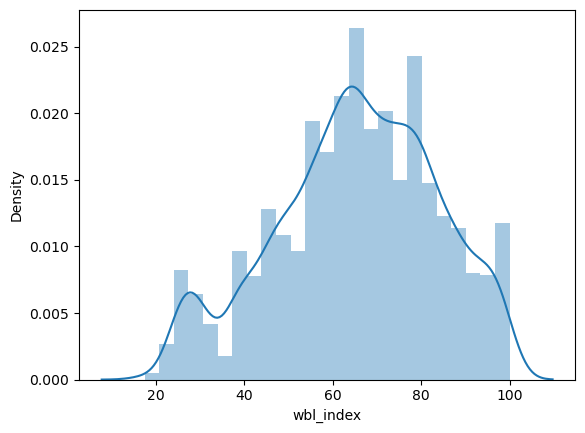

In [35]:
# Check for extreme values for gdp_per_capita

sns.distplot(df_merged['wbl_index'], bins=25) # Shows extreme values

In [36]:
df_merged['wbl_index'].mean() # Check the mean

65.24760197986004

In [37]:
df_merged['wbl_index'].median() # Check the median

66.3

In [38]:
df_merged['wbl_index'].max() # Check the max

100.0

#### There are no extreme values for WBL index. It is a score between 0 and 100. Mean and median are quite close.

C:\Users\polly\AppData\Local\Temp\ipykernel_5456\1904415647.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged['gdp_per_capita'], bins=25) # Shows extreme values


<AxesSubplot: xlabel='gdp_per_capita', ylabel='Density'>

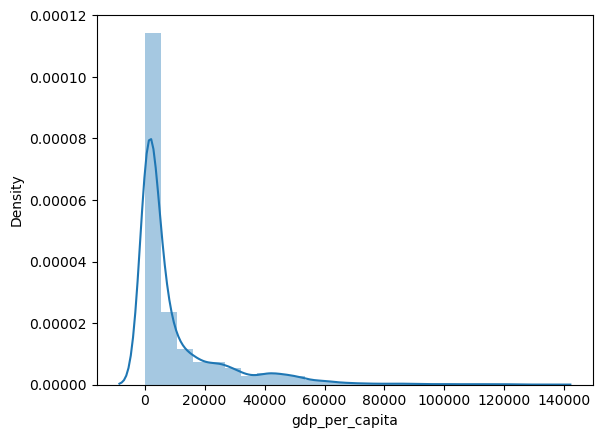

In [39]:
# Check for extreme values for gdp_per_capita

sns.distplot(df_merged['gdp_per_capita'], bins=25) # Shows extreme values

In [40]:
df_merged['gdp_per_capita'].mean() # Check the mean

10190.289603089199

In [41]:
df_merged['gdp_per_capita'].median() # Check the median

3292.498412

In [42]:
df_merged['gdp_per_capita'].max() # Check the max

133590.147

#### The data is right-skewed; there are a few very high values (over 60K); however, they are within the realm of possibility and will not be removed for now.

### 3. Data prep for regression analysis

#### Original hypothesis: Low-income country scores increase less rapidly than high-income country scores.
#### New hypothesis: The higher the per capita GDP, the higher the WBL index score.

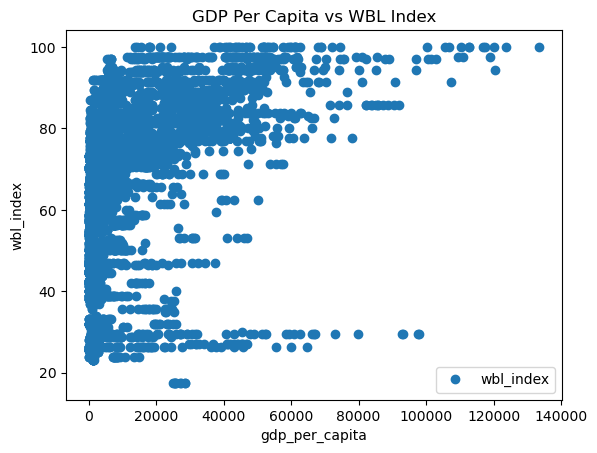

In [43]:
# Create a scatterplot using matplotlib to show how wbl_index and gdp_per_capita are related.

df_merged.plot(x ='gdp_per_capita', y='wbl_index',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('GDP Per Capita vs WBL Index')  
plt.xlabel('gdp_per_capita')  
plt.ylabel('wbl_index')  
plt.show()

In [44]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_merged['gdp_per_capita'].values.reshape(-1,1)
y = df_merged['wbl_index'].values.reshape(-1,1)

In [45]:
X

array([[ 183.5327752],
       [ 183.5327752],
       [ 183.5327752],
       ...,
       [1421.868596 ],
       [1372.696674 ],
       [1773.920411 ]])

In [46]:
y

array([[25.6],
       [25.6],
       [25.6],
       ...,
       [86.9],
       [86.9],
       [86.9]])

In [47]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [48]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [49]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [50]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

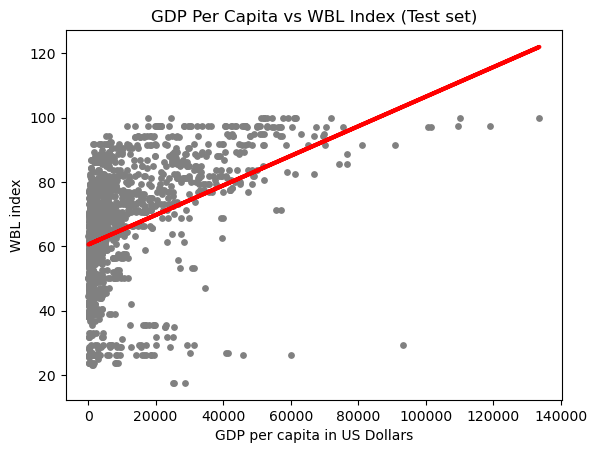

In [51]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP Per Capita vs WBL Index (Test set)')
plot_test.xlabel('GDP per capita in US Dollars')
plot_test.ylabel('WBL index')
plot_test.show()

In [52]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [53]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00046005]]
Mean squared error:  254.6383197933584
R2 score:  0.2287358175682943


In [54]:
y_predicted

array([[60.86688282],
       [62.22565651],
       [65.6650653 ],
       ...,
       [61.53074148],
       [67.22509155],
       [61.80953323]])

In [55]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,51.9,60.866883
1,70.6,62.225657
2,64.4,65.665065
3,76.3,67.423769
4,31.9,60.549866
5,69.4,62.607743
6,43.8,60.812338
7,88.8,75.885808
8,95.0,84.194117
9,58.8,60.761074


#### Compare how the regression fits the training set

In [56]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [57]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [58]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00046005]]
Mean squared error:  284.5165451031002
R2 score:  0.16186960935240113


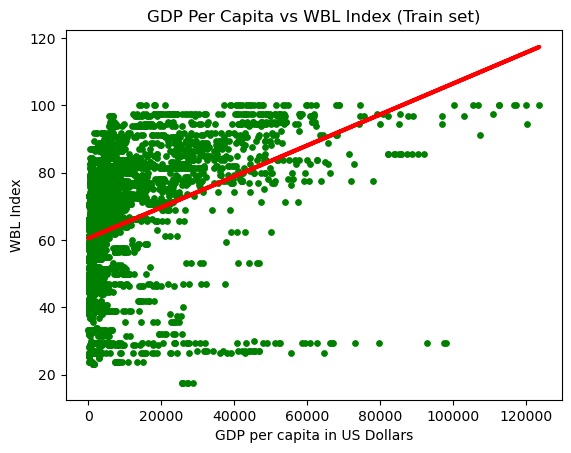

In [59]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP Per Capita vs WBL Index (Train set)')
plot_test.xlabel('GDP per capita in US Dollars')
plot_test.ylabel('WBL Index')
plot_test.show('WBL index')

#### Bonus: performance improvement after removing outliers

#### There are  no outlier values for WBL index; countries are scored between 0 and 100 percent. However, from the scatterplot, you can see that some very high gdp countries still have very low WBL scores. Therefore, I will remove WBL index values below 40, to see if the regression works better with higher WBL scores.

In [60]:
# Clean the lower extreme values from the "wbl_index" variable.

df_test = df_merged[df_merged['wbl_index'] >=40] 

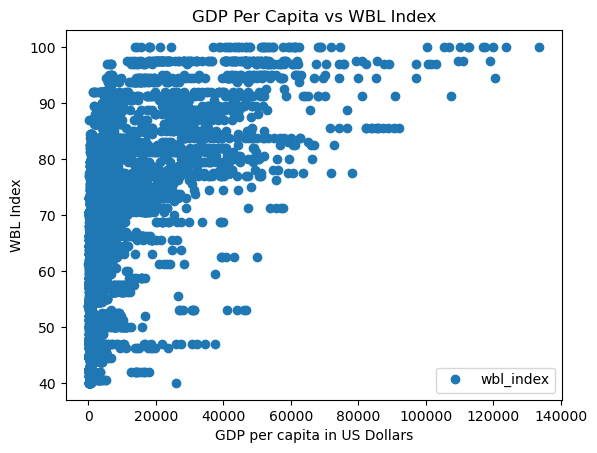

In [61]:
# See how the scatterplot looks without low wbl_index values.

df_test.plot(x ='gdp_per_capita', y='wbl_index',style='o')
plt.title('GDP Per Capita vs WBL Index')  
plt.xlabel('GDP per capita in US Dollars')  
plt.ylabel('WBL Index')  
plt.show()

In [62]:
# Reshape again.

X_2 = df_test['gdp_per_capita'].values.reshape(-1,1)
y_2 = df_test['wbl_index'].values.reshape(-1,1)

In [63]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [64]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [65]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [66]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [67]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00051575]]
Mean squared error:  144.21756068059412
R2 score:  0.33873774186422423


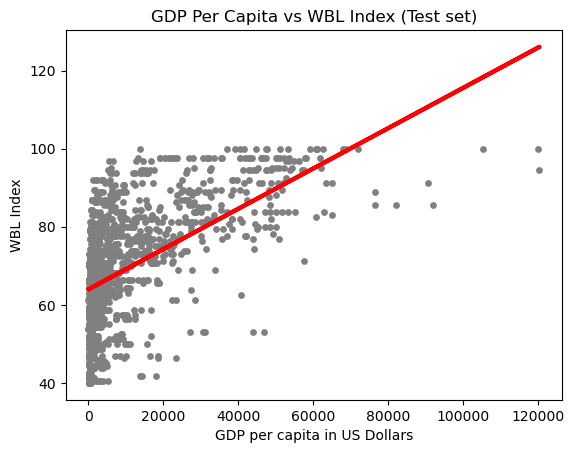

In [68]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('GDP Per Capita vs WBL Index (Test set)')
plot_test.xlabel('GDP per capita in US Dollars')
plot_test.ylabel('WBL Index')
plot_test.show()

In [69]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,91.9,76.800928
1,71.3,65.045493
2,73.1,64.760745
3,55.0,64.130138
4,86.3,78.515072
5,55.0,66.780307
6,63.1,66.579726
7,63.8,64.447637
8,75.0,64.423698
9,65.6,64.205126


Based on the results, we can see that a linear regression does not fit the data well. The results were better when we removed low WBL scores, but not good enough for this model to predict WBL values accurately. The slope coefficient is positive, which indicates a positive relationship (as gdp rises, wbl rises); however, the R2 was very low (23% on the full dataframe and 34% on the modified dataframe) and the MSE was high (255 for the full dataframe and 144 for the modified dataframe). And, finally, the predicted values are quite far off in some instances. Obviously, there are other contributing factors to the WBL score of a country, rather than just the per capita GDP. As I mentioned above, some countries with high GDP had low WBL scores and some countries with low GDP had higher WBL scores. Therefore, there are other factors at play affecting the WBL scores.